In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [170]:
hotel = pd.read_csv('hotel_booking.csv')

In [171]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,01/07/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,01/07/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,02/07/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,02/07/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,03/07/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [172]:
hotel = hotel[['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card', 'hotel', 'customer_type', 'reservation_status']]
hotel.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,required_car_parking_spaces,total_of_special_requests,reservation_status_date,name,email,phone-number,credit_card,hotel,customer_type,reservation_status
0,0,342,2015,July,27,1,0,0,2,0.0,...,0,0,01/07/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,Resort Hotel,Transient,Check-Out
1,0,737,2015,July,27,1,0,0,2,0.0,...,0,0,01/07/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,Resort Hotel,Transient,Check-Out
2,0,7,2015,July,27,1,0,1,1,0.0,...,0,0,02/07/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,Resort Hotel,Transient,Check-Out
3,0,13,2015,July,27,1,0,1,1,0.0,...,0,0,02/07/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,Resort Hotel,Transient,Check-Out
4,0,14,2015,July,27,1,0,2,2,0.0,...,0,1,03/07/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498,Resort Hotel,Transient,Check-Out


In [173]:
X = hotel.iloc[:, :-1]
y = hotel.iloc[:, -1]

### FIND IF ANY FEATURES HAVE MISSING VALUES

In [174]:
hotel.isnull().sum()

is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_

In [175]:
hotel.drop(['agent', 'company', 'name', 'email', 'phone-number', 'credit_card', 'reservation_status_date'], inplace=True, axis=1)
hotel.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel,customer_type,reservation_status
0,0,342,2015,July,27,1,0,0,2,0.0,...,C,3,No Deposit,0,0.0,0,0,Resort Hotel,Transient,Check-Out
1,0,737,2015,July,27,1,0,0,2,0.0,...,C,4,No Deposit,0,0.0,0,0,Resort Hotel,Transient,Check-Out
2,0,7,2015,July,27,1,0,1,1,0.0,...,C,0,No Deposit,0,75.0,0,0,Resort Hotel,Transient,Check-Out
3,0,13,2015,July,27,1,0,1,1,0.0,...,A,0,No Deposit,0,75.0,0,0,Resort Hotel,Transient,Check-Out
4,0,14,2015,July,27,1,0,2,2,0.0,...,A,0,No Deposit,0,98.0,0,1,Resort Hotel,Transient,Check-Out


In [176]:
hotel.isnull().sum()

is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
hotel       

## HANDLE MISSING VALUES OF CATEGORICAL VARIABLES

In [177]:
hotel['country'] = hotel['country'].astype(str)

In [178]:
hotel['country'].value_counts().index

Index(['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD',
       ...
       'MLI', 'UMI', 'MMR', 'NCL', 'PLW', 'BDI', 'BWA', 'CYM', 'BHS', 'KIR'],
      dtype='object', length=178)

In [179]:
hotel['country'].mode()[0]

'PRT'

In [180]:
#imputation function
def impute_nan(hotel, variable):
    most_frequent_category = hotel[variable].value_counts().index[0]
    hotel[variable].fillna(most_frequent_category, inplace=True)

In [181]:
impute_nan(hotel, 'country')

In [182]:
hotel.isnull().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
hotel                             0
customer_type               

## HANDLE MISSING VALUES FOR NUMERICAL VARIABLES

In [183]:
#to create a function to impute NaN values
def impute_nan(hotel, variable, median):
    hotel[variable + '_median'] = hotel[variable].fillna(median)

In [184]:
children_median = hotel.children.median()
impute_nan(hotel, 'children', children_median)

In [232]:
hotel.drop(['children'], axis=1, inplace=True)
hotel = hotel[['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card', 'hotel', 'customer_type', 'children_median', 'reservation_status']]

KeyError: "['children'] not found in axis"

In [233]:
hotel.isnull().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
hotel                             0
customer_type                     0
reservation_status          

## PLOT HISTOGRAM FOR NUMERICAL VARIABLES

In [234]:
hotel.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
babies                              int64
meal                                int64
country                             int64
market_segment                      int64
distribution_channel                int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                  int64
assigned_room_type                  int64
booking_changes                     int64
deposit_type                        int64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces       

In [235]:
hotel.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,...,booking_changes,deposit_type,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel,customer_type,reservation_status,children_median
is_canceled,1.000000,0.293123,0.016660,0.047462,0.008148,-0.006130,-0.001791,0.024765,0.060017,-0.032491,...,-0.144381,-0.476793,0.054186,0.047557,-0.195498,-0.234658,0.136531,0.130676,-0.968316,0.005036
lead_time,0.293123,1.000000,0.040142,0.224414,0.126871,0.002268,0.085671,0.165799,0.119519,-0.020915,...,0.000149,-0.379802,0.170084,-0.063077,-0.116451,-0.095712,0.075381,-0.170922,-0.262950,-0.037613
arrival_date_year,0.016660,0.040142,1.000000,0.041946,-0.540561,-0.000221,0.021497,0.030883,0.029635,-0.013192,...,0.030872,0.065623,-0.056497,0.197580,-0.013684,0.108531,0.035267,0.237583,-0.014626,0.054636
arrival_date_month,0.047462,0.224414,0.041946,1.000000,0.087554,0.008978,0.080075,0.079899,0.133713,0.008622,...,0.002444,0.020691,-0.014468,0.389929,-0.009403,0.045288,0.026470,-0.034133,-0.036899,0.078133
arrival_date_week_number,0.008148,0.126871,-0.540561,0.087554,1.000000,0.066809,0.018208,0.015558,0.025909,0.010395,...,0.005508,-0.005533,0.022933,0.075791,0.001920,0.026149,0.001270,-0.087276,-0.001676,0.005515
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.008978,0.066809,1.000000,-0.016354,-0.028174,-0.001566,-0.000230,...,0.010613,0.004394,0.022728,0.030245,0.008683,0.003062,-0.001862,0.001069,0.002277,0.014553
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.080075,0.018208,-0.016354,1.000000,0.498969,0.091871,0.018483,...,0.063281,0.113288,-0.054151,0.049342,-0.018554,0.072671,-0.186596,0.005601,-0.002600,0.045794
stays_in_week_nights,0.024765,0.165799,0.030883,0.079899,0.015558,-0.028174,0.498969,1.000000,0.092976,0.020191,...,0.096209,0.078588,-0.002020,0.065237,-0.024859,0.068192,-0.234020,-0.009369,-0.024674,0.044203
adults,0.060017,0.119519,0.029635,0.133713,0.025909,-0.001566,0.091871,0.092976,1.000000,0.018146,...,-0.051673,0.028367,-0.008283,0.230641,0.014785,0.122884,-0.013183,0.079714,-0.047614,0.030440
babies,-0.032491,-0.020915,-0.013192,0.008622,0.010395,-0.000230,0.018483,0.020191,0.018146,1.000000,...,0.083440,0.030623,-0.010621,0.029186,0.037383,0.097889,-0.043434,0.020342,0.030728,0.024030


<AxesSubplot:>

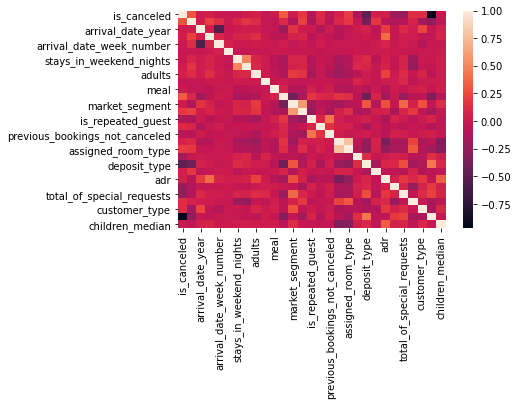

In [236]:
sns.heatmap(hotel.corr())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='is_canceled', ylabel='Density'>

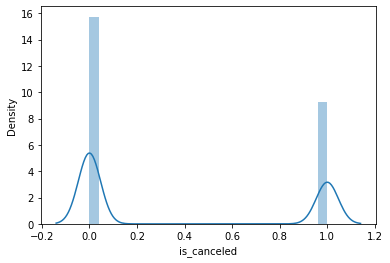

In [237]:
sns.distplot(hotel['is_canceled'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lead_time', ylabel='Density'>

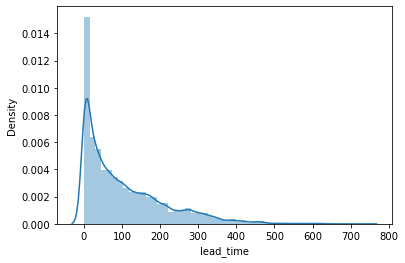

In [238]:
sns.distplot(hotel['lead_time'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arrival_date_year', ylabel='Density'>

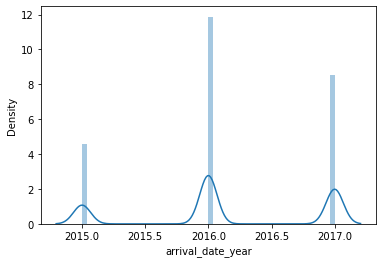

In [239]:
sns.distplot(hotel['arrival_date_year'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arrival_date_week_number', ylabel='Density'>

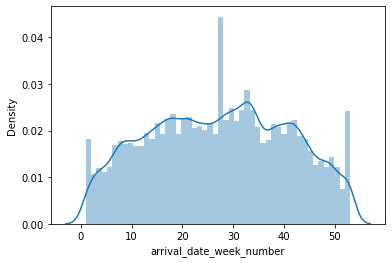

In [240]:
sns.distplot(hotel['arrival_date_week_number'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arrival_date_day_of_month', ylabel='Density'>

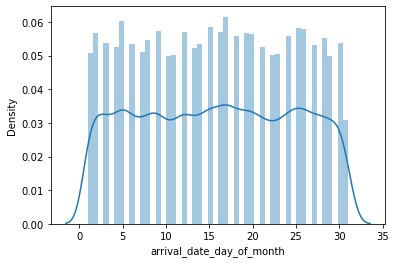

In [241]:
sns.distplot(hotel['arrival_date_day_of_month'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stays_in_weekend_nights', ylabel='Density'>

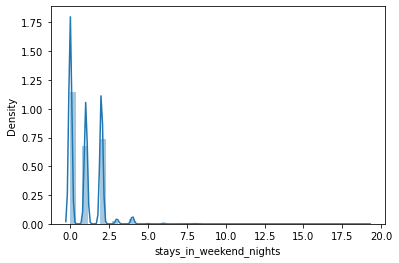

In [242]:
sns.distplot(hotel['stays_in_weekend_nights'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stays_in_week_nights', ylabel='Density'>

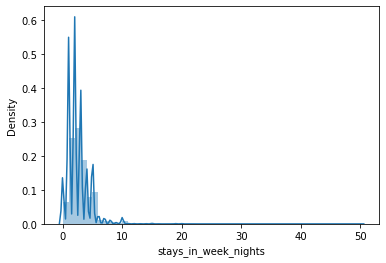

In [243]:
sns.distplot(hotel['stays_in_week_nights'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='adults', ylabel='Density'>

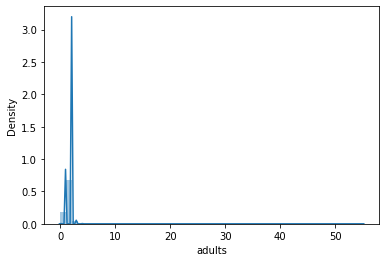

In [244]:
sns.distplot(hotel['adults'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='children_median', ylabel='Density'>

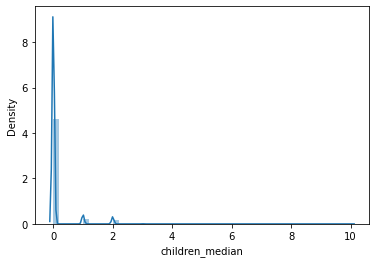

In [245]:
sns.distplot(hotel['children_median'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='is_repeated_guest', ylabel='Density'>

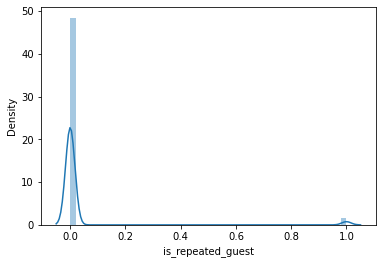

In [246]:
sns.distplot(hotel['is_repeated_guest'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='previous_cancellations', ylabel='Density'>

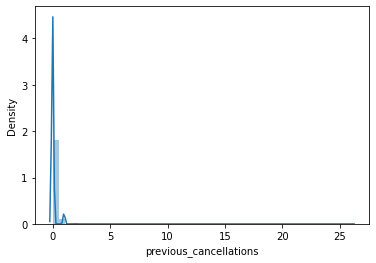

In [247]:
sns.distplot(hotel['previous_cancellations'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='previous_bookings_not_canceled', ylabel='Density'>

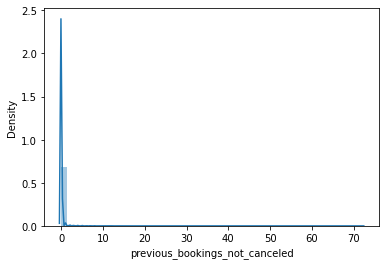

In [248]:
sns.distplot(hotel['previous_bookings_not_canceled'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='booking_changes', ylabel='Density'>

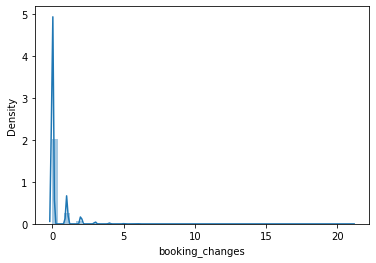

In [249]:
sns.distplot(hotel['booking_changes'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='days_in_waiting_list', ylabel='Density'>

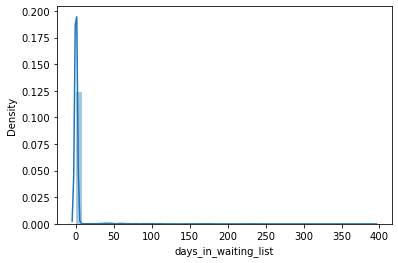

In [250]:
sns.distplot(hotel['days_in_waiting_list'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='adr', ylabel='Density'>

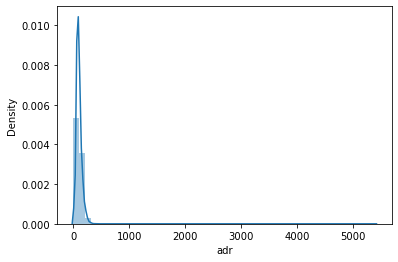

In [251]:
sns.distplot(hotel['adr'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='required_car_parking_spaces', ylabel='Density'>

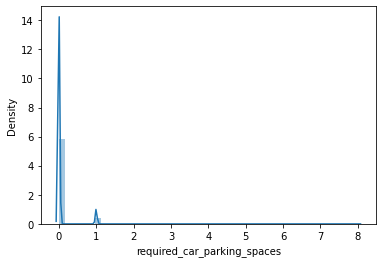

In [252]:
sns.distplot(hotel['required_car_parking_spaces'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_of_special_requests', ylabel='Density'>

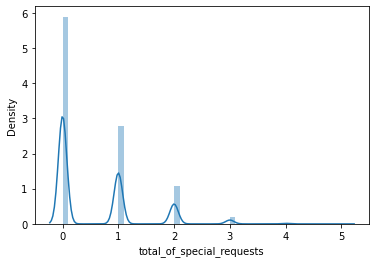

In [253]:
sns.distplot(hotel['total_of_special_requests'])

In [254]:
#to find the number of times a category is present in the variable
hotel_hotel = hotel.hotel.value_counts().to_dict()
hotel_hotel

{79330: 79330, 40060: 40060}

In [255]:
hotel_arrival_date_month = hotel.arrival_date_month.value_counts().to_dict()
hotel_arrival_date_month

{13877: 13877,
 12661: 12661,
 11791: 11791,
 11160: 11160,
 11089: 11089,
 10939: 10939,
 10508: 10508,
 9794: 9794,
 8068: 8068,
 6794: 6794,
 6780: 6780,
 5929: 5929}

In [256]:
hotel_meal = hotel.meal.value_counts().to_dict()
hotel_meal

{92310: 92310, 14463: 14463, 10650: 10650, 1169: 1169, 798: 798}

In [257]:
hotel_market_segment = hotel.market_segment.value_counts().to_dict()
hotel_market_segment

{56477: 56477,
 24219: 24219,
 19811: 19811,
 12606: 12606,
 5295: 5295,
 743: 743,
 237: 237,
 2: 2}

In [258]:
hotel_distribution_channel = hotel.distribution_channel.value_counts().to_dict()
hotel_distribution_channel

{97870: 97870, 14645: 14645, 6677: 6677, 193: 193, 5: 5}

In [259]:
hotel_reserved_room_type = hotel.reserved_room_type.value_counts().to_dict()
hotel_reserved_room_type

{85994: 85994,
 19201: 19201,
 6535: 6535,
 2897: 2897,
 2094: 2094,
 1118: 1118,
 932: 932,
 601: 601,
 12: 12,
 6: 6}

In [260]:
hotel_assigned_room_type = hotel.assigned_room_type.value_counts().to_dict()
hotel_assigned_room_type

{74053: 74053,
 25322: 25322,
 7806: 7806,
 3751: 3751,
 2553: 2553,
 2375: 2375,
 2163: 2163,
 712: 712,
 363: 363,
 279: 279,
 12: 12,
 1: 1}

In [261]:
hotel_deposit_type = hotel.deposit_type.value_counts().to_dict()
hotel_deposit_type

{104641: 104641, 14587: 14587, 162: 162}

In [262]:
hotel_reservation_status = hotel.reservation_status.value_counts().to_dict()
hotel_reservation_status

{75166: 75166, 43017: 43017, 1207: 1207}

In [263]:
hotel_country = hotel.country.value_counts().to_dict()
hotel_country

{48590: 48590,
 12129: 12129,
 10415: 10415,
 8568: 8568,
 7287: 7287,
 3766: 3766,
 3375: 3375,
 2342: 2342,
 2224: 2224,
 2104: 2104,
 2097: 2097,
 1730: 1730,
 1279: 1279,
 1263: 1263,
 1024: 1024,
 999: 999,
 919: 919,
 669: 669,
 632: 632,
 607: 607,
 500: 500,
 488: 488,
 447: 447,
 435: 435,
 426: 426,
 362: 362,
 287: 287,
 259: 259,
 248: 248,
 230: 230,
 214: 214,
 197: 197,
 171: 171,
 166: 166,
 80: 160,
 153: 153,
 152: 152,
 68: 136,
 133: 133,
 130: 130,
 64: 128,
 128: 128,
 114: 114,
 54: 108,
 103: 103,
 101: 101,
 100: 100,
 96: 96,
 90: 90,
 85: 85,
 42: 84,
 81: 81,
 78: 78,
 75: 75,
 74: 74,
 71: 71,
 67: 67,
 59: 59,
 58: 58,
 55: 55,
 52: 52,
 38: 38,
 36: 36,
 35: 35,
 31: 31,
 28: 28,
 24: 24,
 22: 22,
 17: 17,
 15: 15,
 13: 13,
 11: 11}

## Correlation Between the features

In [264]:
hotel.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,...,booking_changes,deposit_type,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel,customer_type,reservation_status,children_median
is_canceled,1.000000,0.293123,0.016660,0.047462,0.008148,-0.006130,-0.001791,0.024765,0.060017,-0.032491,...,-0.144381,-0.476793,0.054186,0.047557,-0.195498,-0.234658,0.136531,0.130676,-0.968316,0.005036
lead_time,0.293123,1.000000,0.040142,0.224414,0.126871,0.002268,0.085671,0.165799,0.119519,-0.020915,...,0.000149,-0.379802,0.170084,-0.063077,-0.116451,-0.095712,0.075381,-0.170922,-0.262950,-0.037613
arrival_date_year,0.016660,0.040142,1.000000,0.041946,-0.540561,-0.000221,0.021497,0.030883,0.029635,-0.013192,...,0.030872,0.065623,-0.056497,0.197580,-0.013684,0.108531,0.035267,0.237583,-0.014626,0.054636
arrival_date_month,0.047462,0.224414,0.041946,1.000000,0.087554,0.008978,0.080075,0.079899,0.133713,0.008622,...,0.002444,0.020691,-0.014468,0.389929,-0.009403,0.045288,0.026470,-0.034133,-0.036899,0.078133
arrival_date_week_number,0.008148,0.126871,-0.540561,0.087554,1.000000,0.066809,0.018208,0.015558,0.025909,0.010395,...,0.005508,-0.005533,0.022933,0.075791,0.001920,0.026149,0.001270,-0.087276,-0.001676,0.005515
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.008978,0.066809,1.000000,-0.016354,-0.028174,-0.001566,-0.000230,...,0.010613,0.004394,0.022728,0.030245,0.008683,0.003062,-0.001862,0.001069,0.002277,0.014553
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.080075,0.018208,-0.016354,1.000000,0.498969,0.091871,0.018483,...,0.063281,0.113288,-0.054151,0.049342,-0.018554,0.072671,-0.186596,0.005601,-0.002600,0.045794
stays_in_week_nights,0.024765,0.165799,0.030883,0.079899,0.015558,-0.028174,0.498969,1.000000,0.092976,0.020191,...,0.096209,0.078588,-0.002020,0.065237,-0.024859,0.068192,-0.234020,-0.009369,-0.024674,0.044203
adults,0.060017,0.119519,0.029635,0.133713,0.025909,-0.001566,0.091871,0.092976,1.000000,0.018146,...,-0.051673,0.028367,-0.008283,0.230641,0.014785,0.122884,-0.013183,0.079714,-0.047614,0.030440
babies,-0.032491,-0.020915,-0.013192,0.008622,0.010395,-0.000230,0.018483,0.020191,0.018146,1.000000,...,0.083440,0.030623,-0.010621,0.029186,0.037383,0.097889,-0.043434,0.020342,0.030728,0.024030


## Convert Categorical Features using Frequencyt Encoding

In [265]:
hotel.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,...,booking_changes,deposit_type,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel,customer_type,reservation_status,children_median
0,0,342,2015,12661,27,1,0,0,2,0,...,3,104641,0,0.0,0,0,40060,89613,75166,0.0
1,0,737,2015,12661,27,1,0,0,2,0,...,4,104641,0,0.0,0,0,40060,89613,75166,0.0
2,0,7,2015,12661,27,1,0,1,1,0,...,0,104641,0,75.0,0,0,40060,89613,75166,0.0
3,0,13,2015,12661,27,1,0,1,1,0,...,0,104641,0,75.0,0,0,40060,89613,75166,0.0
4,0,14,2015,12661,27,1,0,2,2,0,...,0,104641,0,98.0,0,1,40060,89613,75166,0.0


In [266]:
hotel_hotel = hotel.hotel.value_counts().to_dict()
hotel_arrival_date_month = hotel.arrival_date_month.value_counts().to_dict()
hotel_meal = hotel.meal.value_counts().to_dict()
hotel_country = hotel.country.value_counts().to_dict()
hotel_market_segment = hotel.market_segment.value_counts().to_dict()
hotel_distribution_channel = hotel.distribution_channel.value_counts().to_dict()
hotel_reserved_room_type = hotel.reserved_room_type.value_counts().to_dict()
hotel_assigned_room_type = hotel.assigned_room_type.value_counts().to_dict()
hotel_deposit_type = hotel.deposit_type.value_counts().to_dict()
hotel_reservation_status = hotel.reservation_status.value_counts().to_dict()
hotel_customer_type = hotel.customer_type.value_counts().to_dict()

In [267]:
#to replace the categorical values with their count
hotel.hotel = hotel.hotel.map(hotel_hotel)
hotel.arrival_date_month = hotel.arrival_date_month.map(hotel_arrival_date_month)
hotel.meal = hotel.meal.map(hotel_meal)
hotel.country = hotel.country.map(hotel_country)
hotel.market_segment = hotel.market_segment.map(hotel_market_segment)
hotel.distribution_channel = hotel.distribution_channel.map(hotel_distribution_channel)
hotel.reserved_room_type = hotel.reserved_room_type.map(hotel_reserved_room_type)
hotel.assigned_room_type = hotel.assigned_room_type.map(hotel_assigned_room_type)
hotel.deposit_type = hotel.deposit_type.map(hotel_deposit_type)
hotel.reservation_status = hotel.reservation_status.map(hotel_reservation_status)
hotel.customer_type = hotel.customer_type.map(hotel_customer_type)

hotel.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,...,booking_changes,deposit_type,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel,customer_type,reservation_status,children_median
0,0,342,2015,12661,27,1,0,0,2,0,...,3,104641,0,0.0,0,0,40060,89613,75166,0.0
1,0,737,2015,12661,27,1,0,0,2,0,...,4,104641,0,0.0,0,0,40060,89613,75166,0.0
2,0,7,2015,12661,27,1,0,1,1,0,...,0,104641,0,75.0,0,0,40060,89613,75166,0.0
3,0,13,2015,12661,27,1,0,1,1,0,...,0,104641,0,75.0,0,0,40060,89613,75166,0.0
4,0,14,2015,12661,27,1,0,2,2,0,...,0,104641,0,98.0,0,1,40060,89613,75166,0.0


<AxesSubplot:>

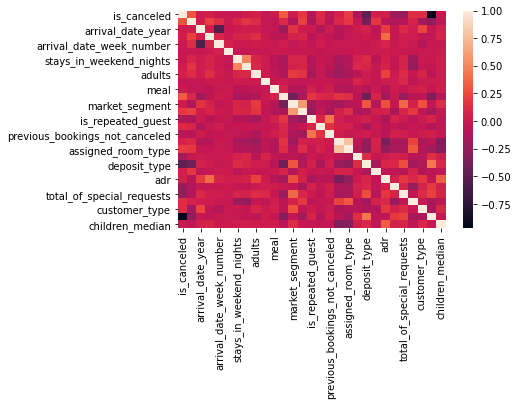

In [268]:
sns.heatmap(hotel.corr())

## TRAIN-TEST SPLIT

In [270]:
#to create the train test split. Test size as 0.3 means 30% test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(hotel.drop('reservation_status', axis=1), hotel['reservation_status'], test_size=0.30, random_state=101)

In [271]:
#to import the Logistic Regression Model (Refer the video on Logistic Regression for Theory as well as Practical)
from sklearn.linear_model import LogisticRegression

In [272]:
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [273]:
predictions = logmodel.predict(X_test)

In [274]:
from sklearn.metrics import confusion_matrix

In [275]:
accuracy = confusion_matrix(Y_test, predictions)

In [276]:
accuracy

array([[    0,    85,   267],
       [    0,  5887,  6986],
       [    0,  1703, 20889]], dtype=int64)

In [277]:
from sklearn.metrics import accuracy_score

In [278]:
accuracy = accuracy_score(Y_test, predictions)
accuracy

0.7475779657704442

## EVALUATION

In [279]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

        1207       0.00      0.00      0.00       352
       43017       0.77      0.46      0.57     12873
       75166       0.74      0.92      0.82     22592

    accuracy                           0.75     35817
   macro avg       0.50      0.46      0.47     35817
weighted avg       0.74      0.75      0.73     35817



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
